In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
dffcleaned1 = pd.read_csv("dffcleaned1.csv")

In [9]:
Cancelleddata = pd.read_csv("Cancelleddata.csv")

In [10]:
dffcleaned1.shape

(522724, 12)

In [11]:
Cancelleddata.shape

(8695, 12)

In [12]:
Cancelleddata.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
OrderType       object
Date            object
Time            object
Revenue        float64
dtype: object

In [13]:
Cancelleddata[Cancelleddata['Quantity'].isin([74215, 80995])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue


In [14]:
dffcleaned1[dffcleaned1['Quantity'].isin([74215, 80995])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
59424,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Regular,2011-01-18,10:01:00,77183.6
521257,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,Regular,2011-12-09,09:15:00,168469.6


In [15]:
Cancelleddata[Cancelleddata['InvoiceNo'].isin([59575 , 521831])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue


In [ ]:
# As these were one time occurences so not including them for analysis.

In [16]:
dffcleaned1[dffcleaned1['StockCode'].str.contains('[A-Z]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Regular,2010-12-01,08:26:00,15.30
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Regular,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Regular,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Regular,2010-12-01,08:26:00,20.34
48,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,Regular,2010-12-01,09:02:00,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...
522593,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713,Germany,Regular,2011-12-09,12:16:00,33.20
522624,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581,United Kingdom,Regular,2011-12-09,12:19:00,17.90
522653,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748,United Kingdom,Regular,2011-12-09,12:20:00,0.84
522659,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748,United Kingdom,Regular,2011-12-09,12:20:00,1.25


In [17]:
a= dffcleaned1[dffcleaned1['StockCode'].str.contains('[A-Z]')].groupby('StockCode')['Description'].unique()

In [18]:
len(a)

931

In [19]:
print(a)

StockCode
10123C              [HEARTS WRAPPING TAPE ]
10124A        [SPOTS ON RED BOOKCOVER TAPE]
10124G           [ARMY CAMO BOOKCOVER TAPE]
15044A                [PINK PAPER PARASOL ]
15044B                [BLUE PAPER PARASOL ]
                          ...              
DCGS0070            [CAMOUFLAGE DOG COLLAR]
DCGS0076     [SUNJAR LED NIGHT NIGHT LIGHT]
DCGSSBOY                   [BOYS PARTY BAG]
DCGSSGIRL                 [GIRLS PARTY BAG]
PADS           [PADS TO MATCH ALL CUSHIONS]
Name: Description, Length: 931, dtype: object


In [20]:
b = dffcleaned1[dffcleaned1['StockCode'].str.match(r'^[A-Za-z]+$')]
b.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
80920,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,Not Found,United Kingdom,Regular,2011-02-07,14:04:00,3.29
80921,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,Not Found,United Kingdom,Regular,2011-02-07,14:04:00,9.87
93627,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,Not Found,United Kingdom,Regular,2011-02-21,18:15:00,3.29
108615,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.29,Not Found,United Kingdom,Regular,2011-03-07,17:22:00,16.45
108616,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,Not Found,United Kingdom,Regular,2011-03-07,17:22:00,16.45


In [21]:
c = dffcleaned1[dffcleaned1['StockCode'].str.match(r'^[A-Za-z]+$')]['StockCode'].unique()
c

array(['DCGSSBOY', 'DCGSSGIRL', 'PADS'], dtype=object)

In [22]:
dffcleaned1[dffcleaned1['StockCode'].isin(c)].groupby('StockCode').first().reset_index()

,StockCode,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
0,DCGSSBOY,543358,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.290,Not Found,United Kingdom,Regular,2011-02-07,14:04:00,3.290
1,DCGSSGIRL,543358,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.290,Not Found,United Kingdom,Regular,2011-02-07,14:04:00,9.870
2,PADS,550193,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,Regular,2011-04-15,09:27:00,0.001


In [23]:
percentage = (len(b) / len(dffcleaned1)) * 100
percentage

0.005165249730259181

In [24]:
dffcleaned1.describe()

,InvoiceNo,Quantity,UnitPrice,Revenue
count,522724.000000,522724.000000,522724.000000,522724.000000
mean,559962.329105,10.639599,3.287860,19.618615
std,13420.637655,156.566664,4.464766,269.891101
min,536365.000000,1.000000,0.001000,0.001000
25%,547906.000000,1.000000,1.250000,3.900000
50%,560689.000000,4.000000,2.080000,9.900000
75%,571809.000000,12.000000,4.130000,17.700000
max,581587.000000,80995.000000,649.500000,168469.600000


In [25]:
dffcleaned1['Revenue'] = (dffcleaned1['Quantity']*dffcleaned1['UnitPrice'])

In [26]:
dffcleaned1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Regular,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Regular,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Regular,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Regular,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Regular,2010-12-01,08:26:00,20.34


In [27]:
import seaborn as sns 

In [28]:
dffcleaned1['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    33,    13,    70,   252,    60,
         216,   384,    27,    15,    22,    19,    17,    21,    34,
          47,   108,    52,    75,   270,    42,   240,    90,   320,
        1824,   204,    69,   160,  2880,  1400,    39,    56,    26,
        1440,    31,    82,    78,    97,    98,    35,   720,   156,
         324,    38,    37,    49,    95,    29,    41,   402,   378,
         150,   300,    54,   104,    67,   258,    66,    44,    55,
          46,    99,    61,   408,   972,   208,  1008,  1000,  1488,
         250,  1394,   400,   110,   272,    84,   113,    45,   106,
          68,   267,   115,    65,  1728,    53,    76,    71,    43,
         213,    58,

In [29]:
dfextreme = dffcleaned1[dffcleaned1['Quantity']>=3000]

In [30]:
dffcleaned1[dffcleaned1['UnitPrice']==0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue


In [31]:
dfextreme.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
50713,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,Regular,2011-01-11,12:55:00,6539.40
59424,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Regular,2011-01-18,10:01:00,77183.60
93809,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom,Regular,2011-02-22,10:43:00,3202.92
154505,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,Regular,2011-04-18,13:20:00,6539.40
198505,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,Regular,2011-05-27,10:52:00,3096.00
260964,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom,Regular,2011-07-19,17:04:00,191.16
406445,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,Regular,2011-10-27,12:26:00,1008.00
418230,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom,Regular,2011-11-02,11:24:00,960.00
521257,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,Regular,2011-12-09,09:15:00,168469.60


In [32]:
dfanalysis = dffcleaned1[dffcleaned1['Quantity'] <= 3000]

In [33]:
dfanalysis.describe()

,InvoiceNo,Quantity,UnitPrice,Revenue
count,522716.00000,522716.000000,522716.000000,522716.000000
mean,559962.39113,10.299941,3.287893,19.109595
std,13420.61950,35.611676,4.464792,83.452373
min,536365.00000,1.000000,0.001000,0.001000
25%,547906.00000,1.000000,1.250000,3.900000
50%,560689.00000,4.000000,2.080000,9.900000
75%,571809.00000,12.000000,4.130000,17.700000
max,581587.00000,3000.000000,649.500000,38970.000000


In [34]:
dfanalysis[dfanalysis['UnitPrice']>=10.000000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue
64,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,Regular,2010-12-01,09:09:00,350.4
149,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2010-12-01 09:45:00,14.95,16098,United Kingdom,Regular,2010-12-01,09:45:00,29.9
150,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,2010-12-01 09:45:00,14.95,16098,United Kingdom,Regular,2010-12-01,09:45:00,29.9
151,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,2010-12-01 09:45:00,16.95,16098,United Kingdom,Regular,2010-12-01,09:45:00,67.8
160,536384,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,2010-12-01 09:53:00,12.75,18074,United Kingdom,Regular,2010-12-01,09:53:00,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...
522371,581500,85066,CREAM SWEETHEART MINI CHEST,4,2011-12-09 10:45:00,12.75,15344,United Kingdom,Regular,2011-12-09,10:45:00,51.0
522561,581571,21258,VICTORIAN SEWING BOX LARGE,8,2011-12-09 12:00:00,10.95,15311,United Kingdom,Regular,2011-12-09,12:00:00,87.6
522579,581574,21258,VICTORIAN SEWING BOX LARGE,2,2011-12-09 12:09:00,12.75,12526,Germany,Regular,2011-12-09,12:09:00,25.5
522580,581574,23111,PARISIENNE SEWING BOX,2,2011-12-09 12:09:00,12.50,12526,Germany,Regular,2011-12-09,12:09:00,25.0


In [35]:
dfanalysis['UnitPrice']  = dfanalysis['UnitPrice'].apply(lambda x : round(x,3))

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\3867892036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanalysis['UnitPrice']  = dfanalysis['UnitPrice'].apply(lambda x : round(x,3))


In [36]:
dfanalysis['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
522719    0.85
522720    2.10
522721    4.15
522722    4.15
522723    4.95
Name: UnitPrice, Length: 522716, dtype: float64

In [37]:
dfanalysis.describe()

,InvoiceNo,Quantity,UnitPrice,Revenue
count,522716.00000,522716.000000,522716.000000,522716.000000
mean,559962.39113,10.299941,3.287893,19.109595
std,13420.61950,35.611676,4.464792,83.452373
min,536365.00000,1.000000,0.001000,0.001000
25%,547906.00000,1.000000,1.250000,3.900000
50%,560689.00000,4.000000,2.080000,9.900000
75%,571809.00000,12.000000,4.130000,17.700000
max,581587.00000,3000.000000,649.500000,38970.000000


In [38]:
dfextreme.describe()

,InvoiceNo,Quantity,UnitPrice,Revenue
count,9.000000,9.000000,9.000000,9.000000
mean,557919.111111,20070.000000,1.050000,29687.786667
std,15227.310034,32669.067124,0.840119,57569.933301
min,540815.000000,3000.000000,0.060000,191.160000
25%,544612.000000,3114.000000,0.320000,1008.000000
50%,554868.000000,3906.000000,0.820000,3202.920000
75%,573008.000000,4800.000000,2.080000,6539.400000
max,581483.000000,80995.000000,2.100000,168469.600000


In [39]:
dfanalysis['UnitPrice'].sort_values(ascending=False)

214484    649.500
214485    649.500
49690     295.000
198170    295.000
79728     295.000
           ...   
225243      0.040
348964      0.001
347151      0.001
151251      0.001
268895      0.001
Name: UnitPrice, Length: 522716, dtype: float64

### EDA

###  A. Categorical Features (Country, CustomerID, StockCode, etc.)

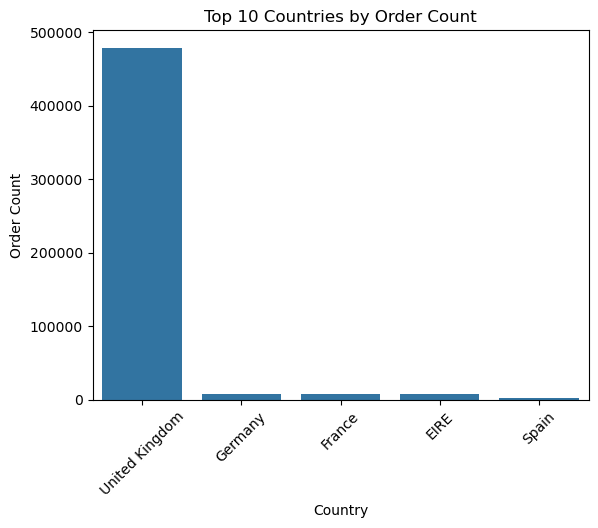

In [40]:
# Top 10 Countries by order count
top_countries = dfanalysis['Country'].value_counts().head(5)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.title('Top 10 Countries by Order Count')
plt.xticks(rotation=45)
plt.show()


### 2️. Bivariate Analysis (Two Variables)

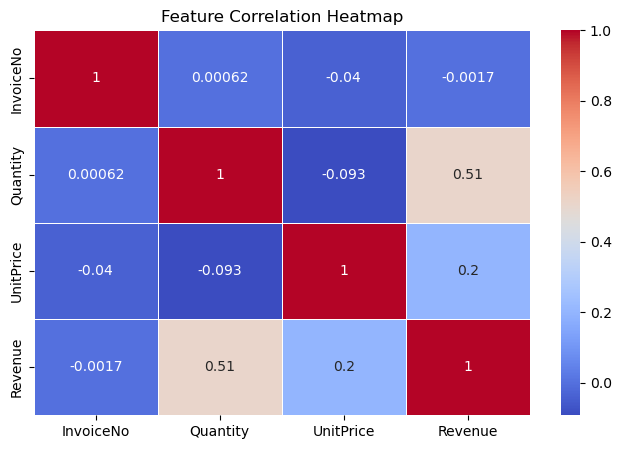

In [41]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
numeric_cols= dfanalysis.select_dtypes(include = ['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


### TRYING PLOTTING THE COUNTRY VS QUANTITY AGAIN EXCLUDING UK AS IT DOMINATES AND USING NP.LOG1P

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\3000999505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log_Quantity'] = np.log1p(filtered_df['Quantity'])


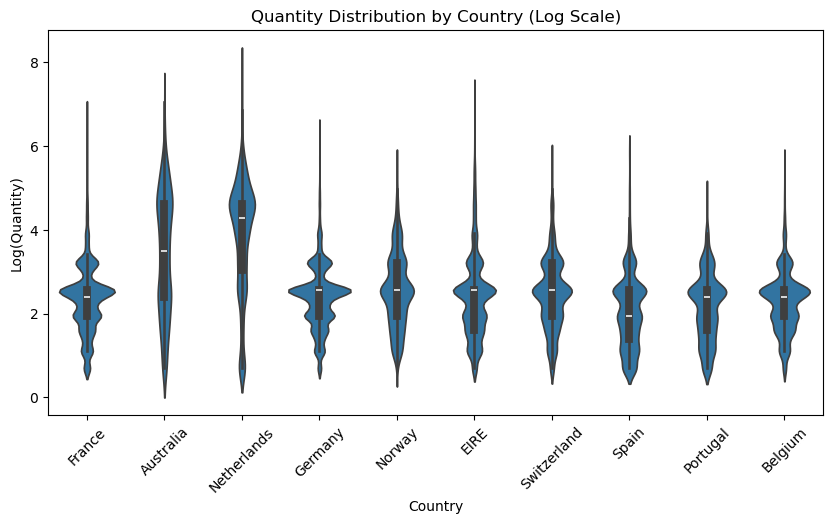

In [42]:
# Filtering top 10 countries by excluding UK for clarity
top_countries = dfanalysis['Country'].value_counts().head(11).index[1:] 
filtered_df = dfanalysis[dfanalysis['Country'].isin(top_countries)]

# Applying log transformation to Quantity
filtered_df['Log_Quantity'] = np.log1p(filtered_df['Quantity'])

# Violin Plot 
plt.figure(figsize=(10, 5))
sns.violinplot(x=filtered_df['Country'], y=filtered_df['Log_Quantity'])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Log(Quantity)')
plt.title('Quantity Distribution by Country (Log Scale)')
plt.show()


In [43]:
dfanalysis.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
OrderType       object
Date            object
Time            object
Revenue        float64
dtype: object

In [44]:
dfanalysis['Date'] = pd.to_datetime(dfanalysis['Date'])

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\3602824920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanalysis['Date'] = pd.to_datetime(dfanalysis['Date'])


C:\Users\91935\AppData\Local\Temp\ipykernel_15552\1117226677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanalysis['DayOfWeek'] = dfanalysis['Date'].dt.day_name()


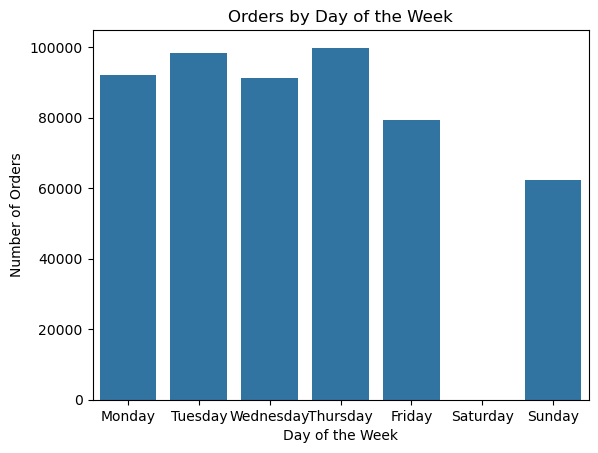

In [45]:
# Orders by day of the week
dfanalysis['DayOfWeek'] = dfanalysis['Date'].dt.day_name()
sns.countplot(x=dfanalysis['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of the Week')
plt.show()


##### AS THE DATA IS ALREADY CLEANED HANDLED MISSING VALUES AND DUPLICATES AND
##### SEPARATED NEGATIVE QUANTITIES/CANCELLED ORDERS IN SEPARATE DATAFRAME CANCELLATIONS NOW WE WILL PERFORM RFM ANALYSIS ON THIS

# RFM

In [46]:
dfrfm = dfanalysis[dfanalysis['CustomerID'] != 'Not Found']

In [47]:
dfrfm.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'OrderType', 'Date', 'Time',
       'Revenue', 'DayOfWeek'],
      dtype='object')

In [48]:
dfrfm['Date'] = pd.to_datetime(dfrfm['Date']) 
last_date = dfrfm['Date'].max()

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\2920093755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrfm['Date'] = pd.to_datetime(dfrfm['Date'])


In [49]:
dfrfm['Revenue'] = dfrfm['Quantity'] * dfrfm['UnitPrice']

# Calculating RFM metrics
RFM = dfrfm.groupby('CustomerID').agg({
    'Date': lambda x: (last_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Revenue': 'sum'  # Monetary
})


# Rename columns
RFM.columns = ['Recency', 'Frequency', 'Monetary']


# Display the first few rows
RFM.head()

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\3288521645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrfm['Revenue'] = dfrfm['Quantity'] * dfrfm['UnitPrice']


,Recency,Frequency,Monetary
CustomerID,,,
12347,2,182,4310.00
12348,75,27,1437.24
12349,18,72,1457.55
12350,310,16,294.40
12352,36,77,1385.74


In [50]:
RFM.describe()

,Recency,Frequency,Monetary
count,4332.00000,4332.000000,4332.000000
mean,92.15651,90.325485,1957.028754
std,100.12398,225.251396,8466.474070
min,0.00000,1.000000,2.900000
25%,17.00000,17.000000,304.240000
50%,50.00000,41.000000,660.660000
75%,142.00000,98.000000,1624.650000
max,373.00000,7667.000000,279138.020000


#### VIEWING OUTLIERS

In [51]:
RFM['Log_Monetary']= np.log1p(RFM['Monetary'])

Q1 = RFM['Log_Monetary'].quantile(0.25)
Q3 = RFM['Log_Monetary'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR  # Dynamic threshold
RFM = RFM[RFM['Log_Monetary'] < threshold]
threshold

9.902509733714737

In [52]:
outlier_rows = RFM[RFM["Log_Monetary"] > threshold]
outlier_rows

,Recency,Frequency,Monetary,Log_Monetary
CustomerID,,,,


In [53]:
outlier_rows.shape

(0, 4)

In [54]:
cust_ids = outlier_rows.index
outlier_data = dfrfm[dfrfm["CustomerID"].isin(outlier_rows.index)]

In [55]:
outlier_data.sort_values(by="Quantity", ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderType,Date,Time,Revenue,DayOfWeek


#### AS OUTLIERS ARE VALID ORDERS KEEPING THEM!

In [56]:
RFM = RFM.drop(columns='Log_Monetary')

#### MINMAXSCALING

#### CUSTOMER SEGMENTATION USING KMEANS

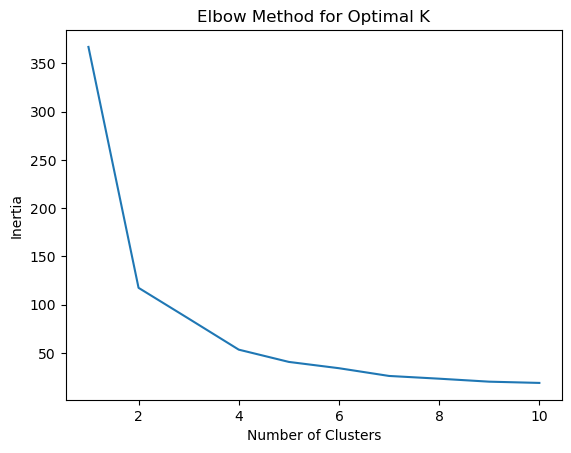

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
RFM_scaled = scaler.fit_transform(RFM)
RFM_scaled = pd.DataFrame(RFM_scaled, columns=['Recency', 'Frequency', 'Monetary'])
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(RFM_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [58]:
corr_matrix = RFM_scaled.select_dtypes(include=['number']).corr()
print(corr_matrix)

            Recency  Frequency  Monetary
Recency    1.000000  -0.308844 -0.306727
Frequency -0.308844   1.000000  0.627148
Monetary  -0.306727   0.627148  1.000000


In [59]:
kmeans = KMeans(n_clusters=2, random_state=42)

RFM['Cluster'] = kmeans.fit_predict(RFM_scaled)  
RFM['Cluster'].value_counts()
RFM.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,41.225365,98.861672,1691.088226
1,247.366512,28.980465,480.383833


In [62]:
RFM.dtypes


Recency         int64
Frequency       int64
Monetary      float64
Cluster         int32
F_score      category
M_score      category
dtype: object

In [64]:
RFM['R_score'] = pd.qcut(RFM['Recency'], 4, labels=[4, 3, 2, 1])
RFM['F_score'] = pd.qcut(RFM['Frequency'], 4, labels=[1, 2, 3, 4])
RFM['M_score'] = pd.qcut(RFM['Monetary'], 4, labels=[1, 2, 3, 4])

RFM['RFM_Score'] = RFM['R_score'].astype(int) + RFM['F_score'].astype(int) + RFM['M_score'].astype(int)

def rfm_segment(score):
    if score >= 10: return 'Best Customers'
    elif score >= 8: return 'Loyal Customers'
    elif score >= 6: return 'Potential Loyalist'
    elif score >= 4: return 'At Risk'
    else: return 'Churned'

RFM['RFM_Segment'] = RFM['RFM_Score'].apply(rfm_segment)

In [65]:
from sklearn.metrics import silhouette_score

# ✅ Convert Cluster to int (already fine, but just in case)
RFM['Cluster'] = RFM['Cluster'].astype(int)

# ✅ Ensure only numeric columns are used
numeric_cols = ['Recency', 'Frequency', 'Monetary', 'RFM_Score']  # Exclude categories & objects
cluster_summary = RFM[numeric_cols].groupby(RFM['Cluster']).mean()
print(cluster_summary)

# ✅ Compute Silhouette Score (Use RFM_scaled for distances, RFM for labels)
sil_score = silhouette_score(RFM_scaled, RFM['Cluster'])
print("Silhouette Score: ", sil_score)


            Recency  Frequency     Monetary  RFM_Score
Cluster                                               
0         41.225365  98.861672  1691.088226   8.497669
1        247.366512  28.980465   480.383833   4.512558
Silhouette Score:  0.6538984069785315


#### SILHUOETTE SCORE

In [66]:
sil_score = silhouette_score(RFM_scaled, RFM['Cluster'])
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.6538984069785315


#### VISUALIZATIONS AFTER RFM AND K MEANS

#### HOW MANY CUSTOMERS IN EACH CLUSTER, CLUSTER DISTRIBUTION

C:\Users\91935\AppData\Local\Temp\ipykernel_15552\2758196546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RFM["Cluster"], palette="coolwarm")


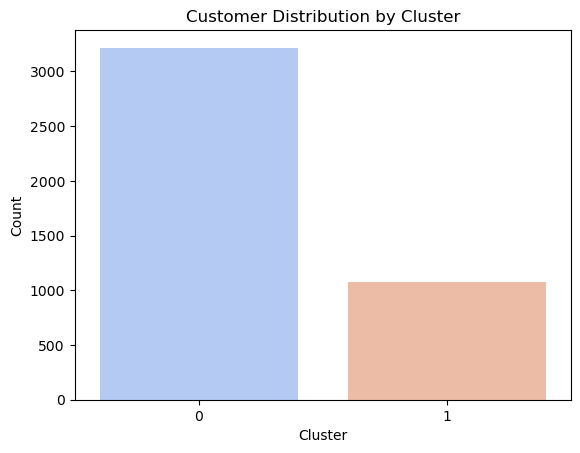

In [67]:
sns.countplot(x=RFM["Cluster"], palette="coolwarm")
plt.title("Customer Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

#### HOW MUCH EACH CLUSTER SPENDS, CLUSTER VS MONETARY

In [68]:
RFM[RFM["Cluster"].isnull()]  # Check missing clusters THIS LINE CREATES ERROR SO ADDED CLUSTER COLUMN BELOW


,Recency,Frequency,Monetary,Cluster,F_score,M_score,R_score,RFM_Score,RFM_Segment
CustomerID,,,,,,,,,


In [69]:
print(RFM["Cluster"].unique())  # Check cluster values

[0 1]


In [70]:
RFM.shape

(4292, 9)

In [71]:
RFM.columns

Index(['Recency', 'Frequency', 'Monetary', 'Cluster', 'F_score', 'M_score',
       'R_score', 'RFM_Score', 'RFM_Segment'],
      dtype='object')

In [72]:
RFM.shape

(4292, 9)

In [73]:
RFM.head(5)

,Recency,Frequency,Monetary,Cluster,F_score,M_score,R_score,RFM_Score,RFM_Segment
CustomerID,,,,,,,,,
12347,2,182,4310.00,0,4,4,4,12,Best Customers
12348,75,27,1437.24,0,2,3,2,7,Potential Loyalist
12349,18,72,1457.55,0,3,3,4,10,Best Customers
12350,310,16,294.40,1,1,1,1,3,Churned
12352,36,77,1385.74,0,3,3,3,9,Loyal Customers


In [74]:
RFM.columns

Index(['Recency', 'Frequency', 'Monetary', 'Cluster', 'F_score', 'M_score',
       'R_score', 'RFM_Score', 'RFM_Segment'],
      dtype='object')

In [75]:
print(RFM.head())  # Check if Cluster is added

            Recency  Frequency  Monetary  Cluster F_score M_score R_score  \
CustomerID                                                                  
12347             2        182   4310.00        0       4       4       4   
12348            75         27   1437.24        0       2       3       2   
12349            18         72   1457.55        0       3       3       4   
12350           310         16    294.40        1       1       1       1   
12352            36         77   1385.74        0       3       3       3   

            RFM_Score         RFM_Segment  
CustomerID                                 
12347              12      Best Customers  
12348               7  Potential Loyalist  
12349              10      Best Customers  
12350               3             Churned  
12352               9     Loyal Customers  


In [76]:
RFM.head()

,Recency,Frequency,Monetary,Cluster,F_score,M_score,R_score,RFM_Score,RFM_Segment
CustomerID,,,,,,,,,
12347,2,182,4310.00,0,4,4,4,12,Best Customers
12348,75,27,1437.24,0,2,3,2,7,Potential Loyalist
12349,18,72,1457.55,0,3,3,4,10,Best Customers
12350,310,16,294.40,1,1,1,1,3,Churned
12352,36,77,1385.74,0,3,3,3,9,Loyal Customers


C:\Users\91935\AppData\Local\Temp\ipykernel_15552\1472274204.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Monetary', data=RFM, estimator=sum, palette='viridis', ci=None)
C:\Users\91935\AppData\Local\Temp\ipykernel_15552\1472274204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Monetary', data=RFM, estimator=sum, palette='viridis', ci=None)


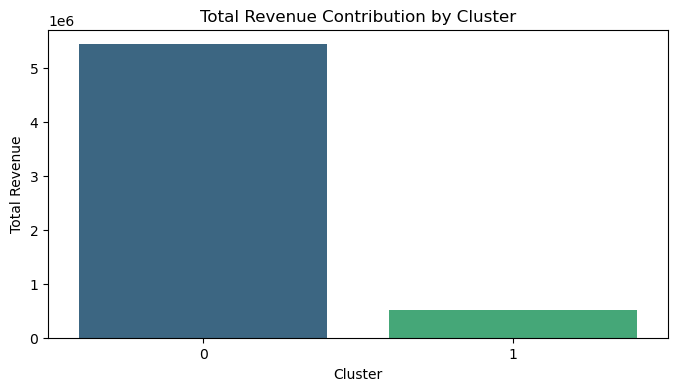

In [77]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Cluster', y='Monetary', data=RFM, estimator=sum, palette='viridis', ci=None)
plt.title('Total Revenue Contribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.show()

#### WHO BUYS THE MOST OFTEN, CLUSTER VS FREQUENCY

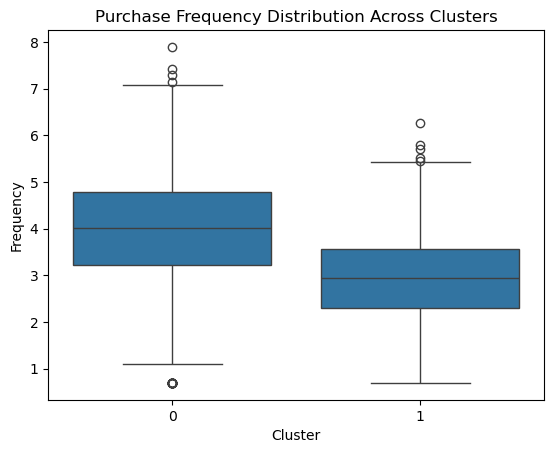

In [78]:
sns.boxplot(x=RFM['Cluster'], y=np.log1p(RFM['Frequency']), data=RFM)
plt.title('Purchase Frequency Distribution Across Clusters')
plt.show()


#### WHO ARE THE MOST RECENT BUYERS, CLUSTER VS RECENCY

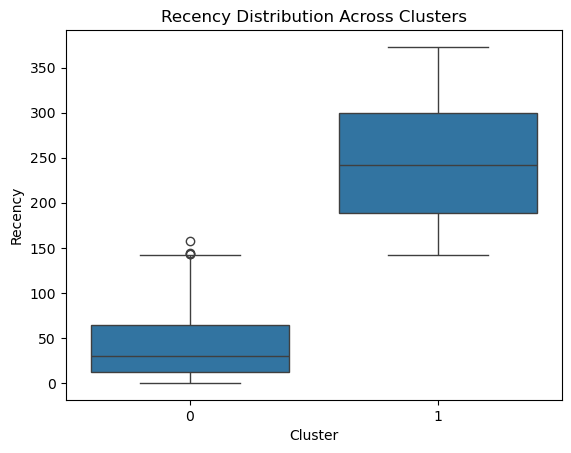

In [79]:
sns.boxplot(x=RFM['Cluster'], y=RFM['Recency'], data=RFM)
plt.title('Recency Distribution Across Clusters')
plt.show()


#### FREQUENCY VS MONETARY 

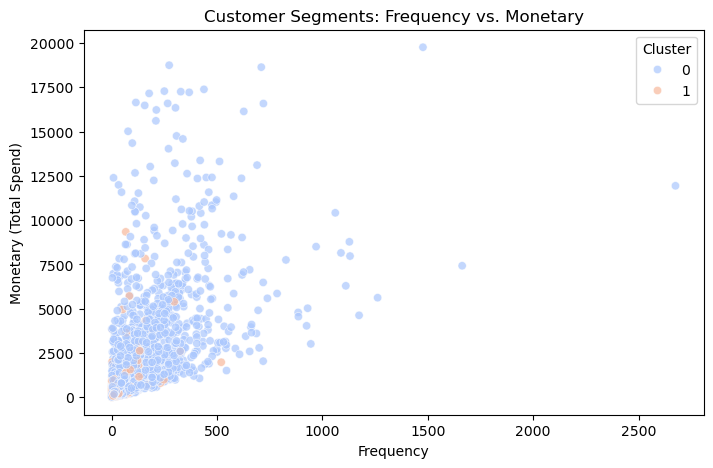

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=RFM['Frequency'], 
    y=RFM['Monetary'], 
    hue=RFM['Cluster'], 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Customer Segments: Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary (Total Spend)')
plt.legend(title='Cluster')
plt.show()

#### RECENCY VS MONETARY

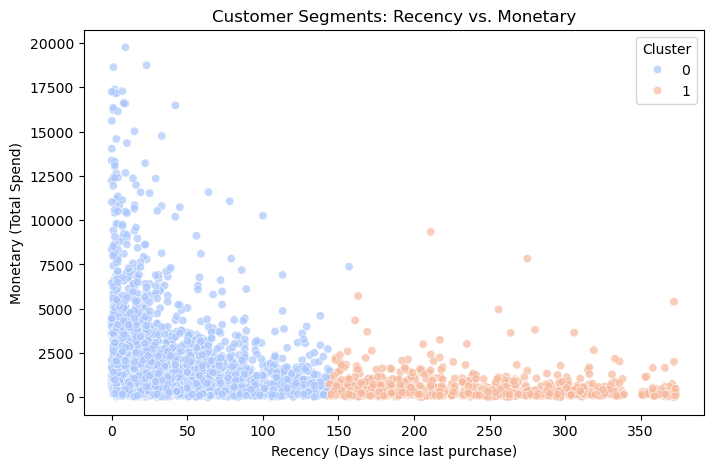

In [81]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=RFM['Recency'], 
    y=RFM['Monetary'], 
    hue=RFM['Cluster'], 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Customer Segments: Recency vs. Monetary')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary (Total Spend)')
plt.legend(title='Cluster')
plt.show()

#### RECENCY VS FREQUENCY 

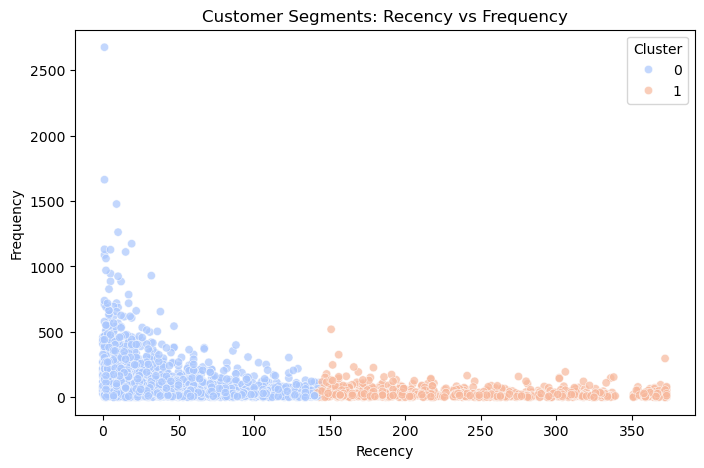

In [82]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=RFM['Recency'], 
    y=RFM['Frequency'], 
    hue=RFM['Cluster'], 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

In [83]:
#From the plot you generated:

#1️⃣ Most Customers Are in Cluster 0 (Blue)

 #   They have low recency (~0-50 days), meaning they have purchased **

#recently**.



 #   They also have higher frequency, with many making multiple purchases.
  #  These are likely active and loyal customers.

#2️⃣ Cluster 1 (Orange) Has High Recency (~150-350 Days)

 #   These customers haven't purchased in a long time.
  #  They also have low frequency, meaning they didn’t buy much even when they were active.
   # These could be churned or at-risk customers.







#What Actions Can You Take?

#✅ For Cluster 0 (Loyal Customers):

#    Loyalty Programs: Reward them with discounts or exclusive offers.
#    Upselling & Cross-Selling: Recommend similar products based on purchase history.

#✅ For Cluster 1 (Churned Customers):

 #   Re-engagement Campaigns: Offer personalized discounts or email them about new products.
  #  Survey or Feedback: Find out why they stopped buying.

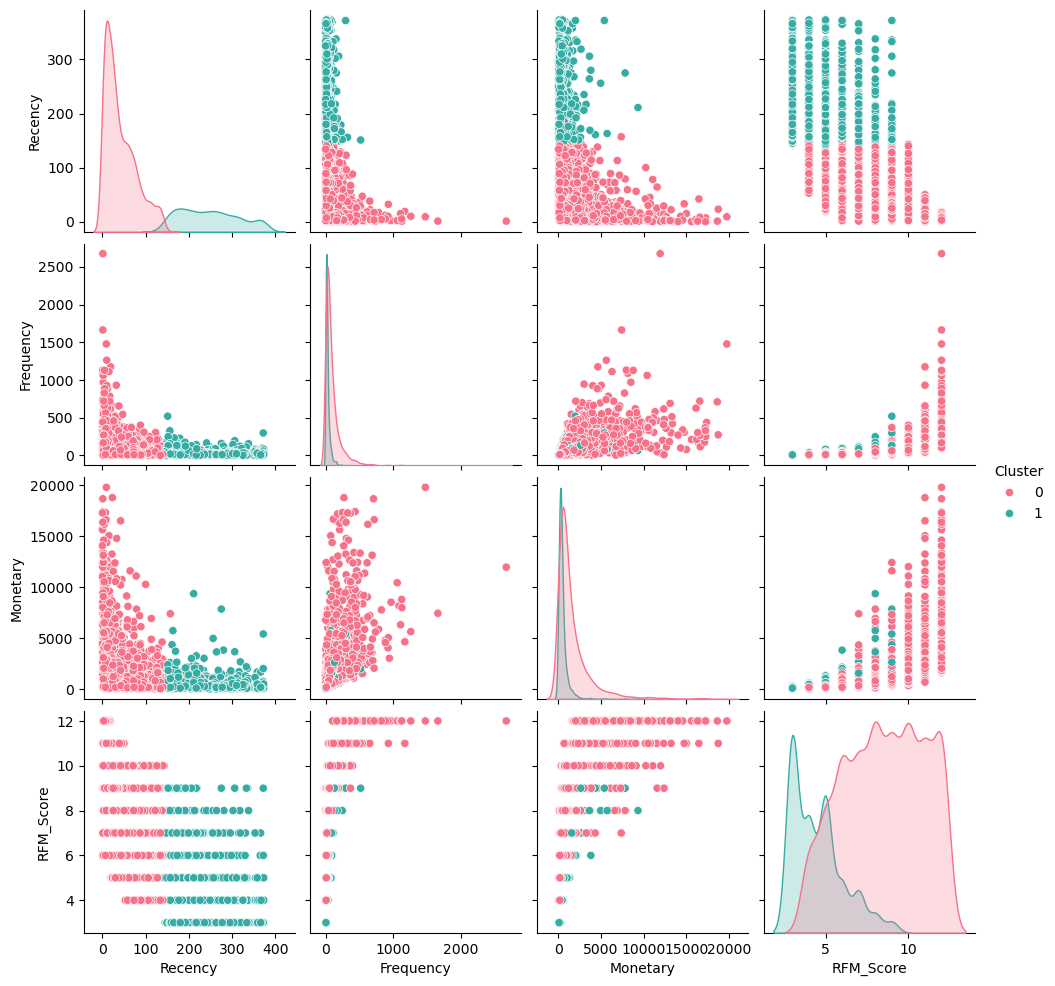

In [84]:
sns.pairplot(RFM, hue='Cluster', palette='husl')
plt.show()

#### ANALYSIS

In [85]:
high_value_customers = RFM[(RFM['Monetary'] > RFM['Monetary'].quantile(0.75)) &
                           (RFM['Frequency'] > RFM['Frequency'].quantile(0.75)) &
                           (RFM['Recency'] < RFM['Recency'].quantile(0.25))]

print(high_value_customers)

            Recency  Frequency  Monetary  Cluster F_score M_score R_score  \
CustomerID                                                                  
12347             2        182   4310.00        0       4       4       4   
12362             3        256   4737.23        0       4       4       4   
12388            15        100   2780.66        0       4       4       4   
12417             3        183   3226.10        0       4       4       4   
12423             0        117   1634.31        0       4       4       4   
...             ...        ...       ...      ...     ...     ...     ...   
18229            11        164   7276.90        0       4       4       4   
18241             9        104   2073.09        0       4       4       4   
18245             7        175   2567.06        0       4       4       4   
18272             2        166   3078.58        0       4       4       4   
18283             3        719   2039.58        0       4       4       4   

In [86]:
#🎯 These customers purchase frequently, recently, and spend a lot → VIP Customers.
#🚀 Business Action:

 #   Give exclusive discounts, early product access, loyalty rewards.
  #  Personalized recommendations based on past purchases.

In [87]:
churned_customers = RFM[
    (RFM['Frequency'] < RFM['Frequency'].quantile(0.25)) &  
    (RFM['Recency'] > RFM['Recency'].quantile(0.75)) &  
    (RFM['Monetary'] < RFM['Monetary'].quantile(0.25))  
]
print(churned_customers)

            Recency  Frequency  Monetary  Cluster F_score M_score R_score  \
CustomerID                                                                  
12350           310         16    294.40        1       1       1       1   
12353           204          4     89.00        1       1       1       1   
12361           287          9    174.90        1       1       1       1   
12401           303          4     69.30        1       1       1       1   
12402           323         10    195.60        1       1       1       1   
...             ...        ...       ...      ...     ...     ...     ...   
18224           263         10    158.95        1       1       1       1   
18227           217          5     93.75        1       1       1       1   
18269           366          7    168.60        1       1       1       1   
18280           277         10    180.60        1       1       1       1   
18281           180          7     80.82        1       1       1       1   

In [88]:
#🚨 These customers bought very few times, long ago, and spent little → Most likely lost customers.
#🛠 Business Action:

 #   Send win-back campaigns (e.g., special discounts).
  #  Ask for feedback on why they left.

In [89]:
loyal_customers = RFM[(RFM['Frequency'] > RFM['Frequency'].quantile(0.75)) & 
                        (RFM['Recency'] < RFM['Recency'].quantile(0.25))]
print(loyal_customers)


            Recency  Frequency  Monetary  Cluster F_score M_score R_score  \
CustomerID                                                                  
12347             2        182   4310.00        0       4       4       4   
12362             3        256   4737.23        0       4       4       4   
12388            15        100   2780.66        0       4       4       4   
12417             3        183   3226.10        0       4       4       4   
12423             0        117   1634.31        0       4       4       4   
...             ...        ...       ...      ...     ...     ...     ...   
18229            11        164   7276.90        0       4       4       4   
18241             9        104   2073.09        0       4       4       4   
18245             7        175   2567.06        0       4       4       4   
18272             2        166   3078.58        0       4       4       4   
18283             3        719   2039.58        0       4       4       4   

In [90]:
#🎯 These customers buy often and recently → good for loyalty programs!

In [91]:
churned_customers = RFM[(RFM['Frequency'] < RFM['Frequency'].quantile(0.25)) & 
                          (RFM['Recency'] > RFM['Recency'].quantile(0.75))]
print(churned_customers)


            Recency  Frequency  Monetary  Cluster F_score M_score R_score  \
CustomerID                                                                  
12350           310         16    294.40        1       1       1       1   
12353           204          4     89.00        1       1       1       1   
12355           214         13    459.40        1       1       2       1   
12361           287          9    174.90        1       1       1       1   
12373           311         13    324.60        1       1       2       1   
...             ...        ...       ...      ...     ...     ...     ...   
18227           217          5     93.75        1       1       1       1   
18233           325          1    440.00        1       1       2       1   
18269           366          7    168.60        1       1       1       1   
18280           277         10    180.60        1       1       1       1   
18281           180          7     80.82        1       1       1       1   

In [92]:
#🚨 These customers haven’t bought in a long time → they might churn!

#### COMPARING KMEANS CLUSTERS AND RFM SEGMENTS 

In [93]:
RFM['R_score'] = pd.qcut(RFM['Recency'], 4, labels=[4, 3, 2, 1])
RFM['F_score'] = pd.qcut(RFM['Frequency'], 4, labels=[1, 2, 3, 4])
RFM['M_score'] = pd.qcut(RFM['Monetary'], 4, labels=[1, 2, 3, 4])

RFM['RFM_Score'] = RFM['R_score'].astype(int) + RFM['F_score'].astype(int) + RFM['M_score'].astype(int)

def rfm_segment(score):
    if score >= 10: return 'Best Customers'
    elif score >= 8: return 'Loyal Customers'
    elif score >= 6: return 'Potential Loyalist'
    elif score >= 4: return 'At Risk'
    else: return 'Churned'

RFM['RFM_Segment'] = RFM['RFM_Score'].apply(rfm_segment)


In [94]:
comparison = RFM.groupby(['RFM_Segment', 'Cluster']).size().unstack()
print(comparison)

Cluster                  0      1
RFM_Segment                      
At Risk              425.0  467.0
Best Customers      1244.0    NaN
Churned                NaN  379.0
Loyal Customers      828.0   57.0
Potential Loyalist   720.0  172.0


<Axes: xlabel='Cluster', ylabel='RFM_Segment'>

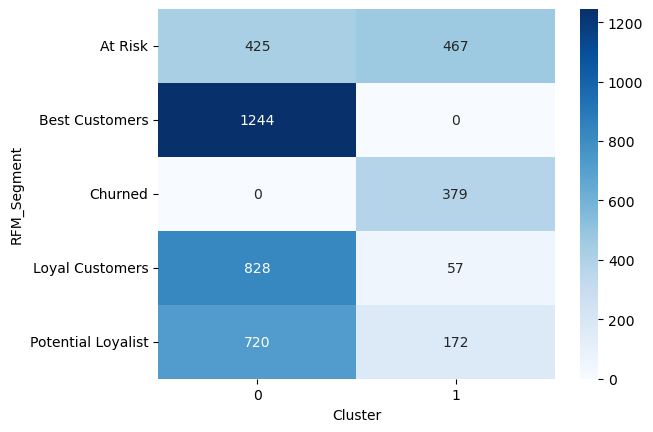

In [95]:
sns.heatmap(comparison.fillna(0).astype(int), annot=True, cmap="Blues", fmt="d")

In [96]:
#pd.set_option('display.max_rows', None)
#rfm1['Monetary'].value_counts()

In [97]:
RFM.dtypes

Recency           int64
Frequency         int64
Monetary        float64
Cluster           int32
F_score        category
M_score        category
R_score        category
RFM_Score         int32
RFM_Segment      object
dtype: object

In [98]:
corr_matrix = RFM_scaled.select_dtypes(include=['number']).corr()
print(corr_matrix)

            Recency  Frequency  Monetary
Recency    1.000000  -0.308844 -0.306727
Frequency -0.308844   1.000000  0.627148
Monetary  -0.306727   0.627148  1.000000


In [99]:
RFM.shape

(4292, 9)

#### OVERALL ANALYSIS

#### REVENUE GRAPHS

# DAILY

In [100]:
dfanalysis = dfanalysis.set_index('Date')

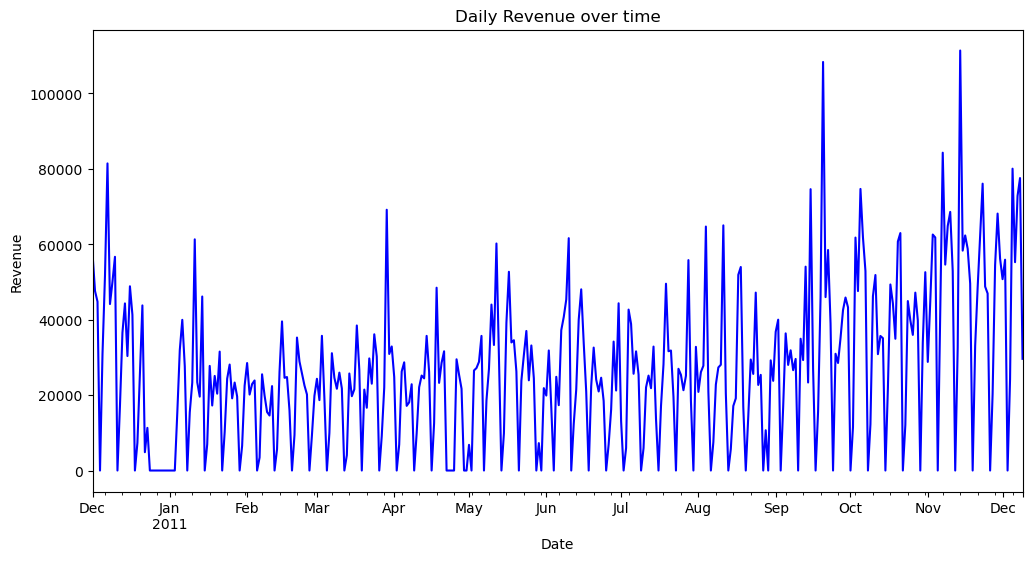

In [101]:

dfanalysis.resample('D')['Revenue'].sum().plot(figsize=(12,6), color='blue', title='Daily Revenue over time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

##  WEEKLY

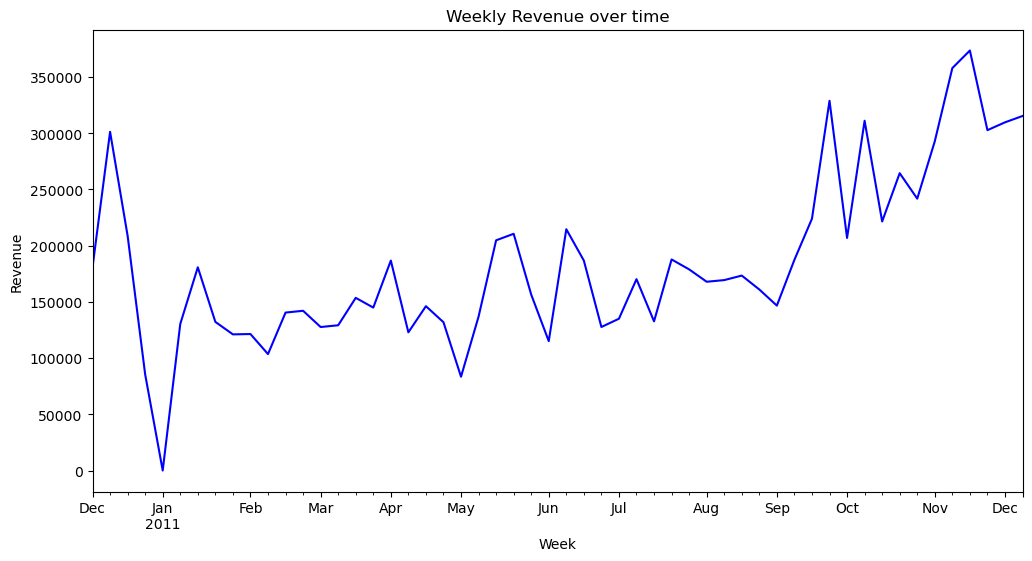

In [102]:
dfanalysis.resample('W')['Revenue'].sum().plot(figsize=(12,6), color='blue', title='Weekly Revenue over time')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

###   MONTHLY

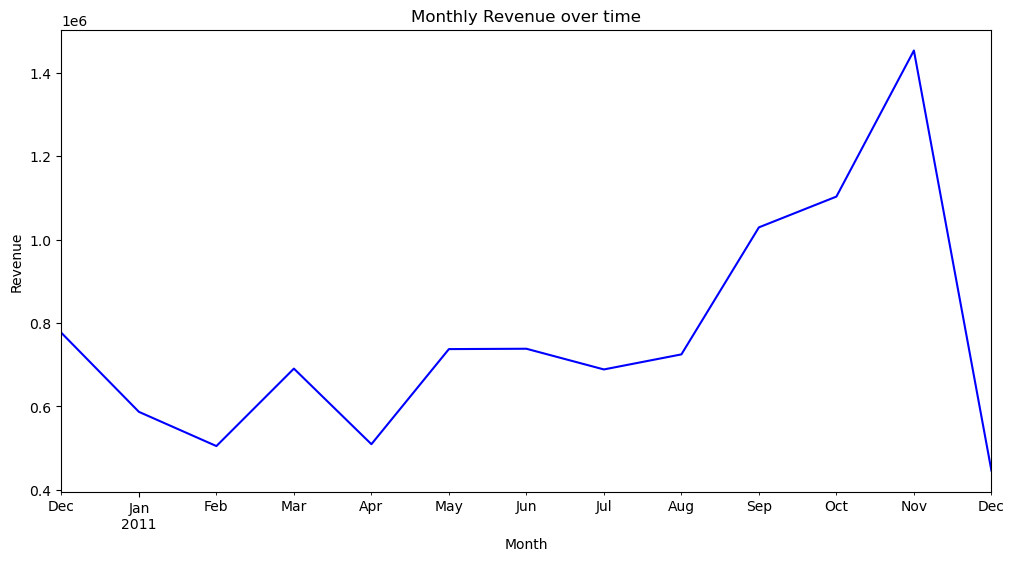

In [103]:
import matplotlib.pyplot as plt 

dfanalysis.resample('ME')['Revenue'].sum().plot(figsize=(12,6), color='blue', title='Monthly Revenue over time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### TOP 10 CUSTOMERS

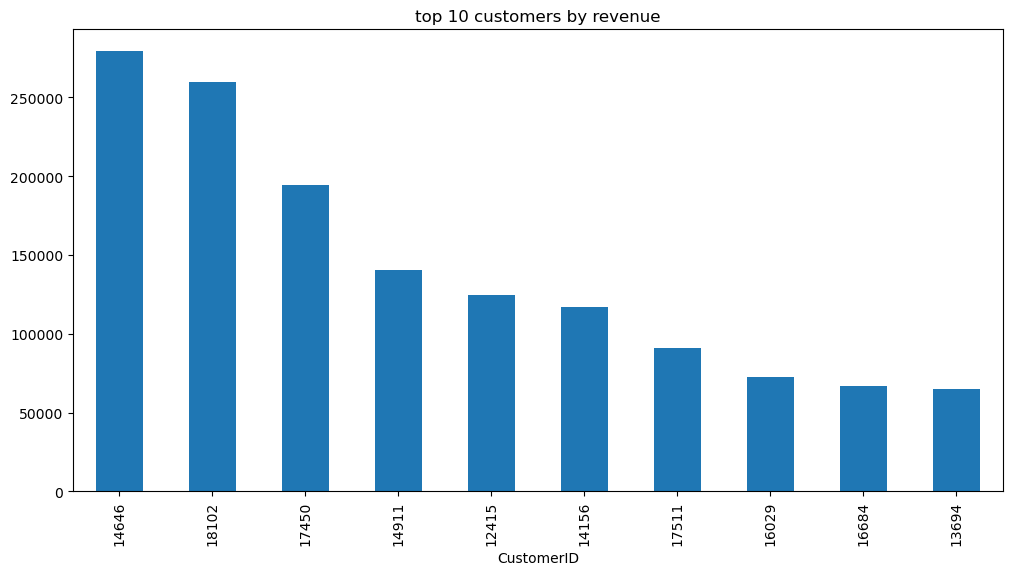

In [104]:
dftop = dfanalysis[dfanalysis['CustomerID'] != 'Not Found']
cust_revenue = dftop.groupby('CustomerID')['Revenue'].sum().nlargest(10)
cust_revenue.plot(kind = 'bar', figsize=(12,6), title='top 10 customers by revenue')
plt.show()

In [105]:
RFM.to_csv('RFMPB')

In [106]:
RFM_scaled.to_csv('RFM_scaledPB')

In [107]:
dfanalysis.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
OrderType       object
Time            object
Revenue        float64
DayOfWeek       object
dtype: object

In [108]:
RFM.dtypes

Recency           int64
Frequency         int64
Monetary        float64
Cluster           int32
F_score        category
M_score        category
R_score        category
RFM_Score         int32
RFM_Segment      object
dtype: object

In [109]:
Main_revenue = dffcleaned1['Revenue'].sum()
Main_revenue

10255121.134

In [110]:
Cancelleddata.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'OrderType', 'Date', 'Time',
       'Revenue'],
      dtype='object')

In [111]:
Cancelled_revenue =Cancelleddata['Revenue'].sum()
Cancelled_revenue

-483306.80000000005

In [112]:
Total_revenue = Main_revenue + Cancelled_revenue  # Since cancellations are negative
print("Total Net Revenue:", Total_revenue)


Total Net Revenue: 9771814.333999999
